In [76]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def plotFaceShape(shape):
    plt.plot(shape[0:15, 0], shape[0:15, 1])
    plt.plot(shape[0:15, 0], shape[0:15, 1], 'bo')
    
    plt.plot(shape[15:21,0], shape[15:21, 1], 'g')
    plt.plot(shape[15:21,0], shape[15:21, 1], 'go')
    plt.plot(shape[21:27,0], shape[21:27, 1], 'g')
    plt.plot(shape[21:27,0], shape[21:27, 1], 'go')
    
    plt.plot(shape[27:31,0], shape[27:31, 1], 'r')
    plt.plot(shape[27:31,0], shape[27:31, 1], 'ro')
    plt.plot(shape[32:36,0], shape[32:36, 1], 'r')
    plt.plot(shape[32:36,0], shape[32:36, 1], 'ro')
    plt.plot(shape[68:72,0], shape[68:72, 1], 'r')
    plt.plot(shape[68:72,0], shape[68:72, 1], 'ro')
    plt.plot(shape[72:76,0], shape[72:76, 1], 'r')
    plt.plot(shape[72:76,0], shape[72:76, 1], 'ro')
    

    plt.plot(shape[37:46,0], shape[37:46, 1], 'y')
    plt.plot(shape[37:46,0], shape[37:46, 1], 'yo')

    plt.plot(shape[48:60,0], shape[48:60, 1], 'c')
    plt.plot(shape[48:60,0], shape[48:60, 1], 'co')
    plt.plot(shape[60:66,0], shape[60:66, 1], 'c')
    plt.plot(shape[60:66,0], shape[60:66, 1], 'co')
    
    extra_points = np.array([31,36,66,67])
    plt.plot(shape[extra_points,0], shape[extra_points,1], 'y*')
    
def plotFaceShapeFromStasm(shape):
    plt.plot(shape[0:16, 0], shape[0:16, 1])
    plt.plot(shape[0:16, 0], shape[0:16, 1], 'bo')
    
    plt.plot(shape[16:22,0], shape[16:22, 1], 'g')
    plt.plot(shape[16:22,0], shape[16:22, 1], 'go')
    plt.plot(shape[22:28,0], shape[22:28, 1], 'g')
    plt.plot(shape[22:28,0], shape[22:28, 1], 'go')
    
    plt.plot(shape[30:39,0], shape[30:39, 1], 'r')
    plt.plot(shape[30:39,0], shape[30:39, 1], 'ro')
    plt.plot(shape[39:48,0], shape[39:48, 1], 'r')
    plt.plot(shape[39:48,0], shape[39:48, 1], 'ro')
    plt.plot(shape[49:59,0], shape[49:59, 1], 'y')
    plt.plot(shape[49:59,0], shape[49:59, 1], 'yo')
    plt.plot(shape[59:77,0], shape[59:77, 1], 'c')
    plt.plot(shape[59:79,0], shape[59:77, 1], 'co')
    


In [65]:
np.concatenate(([0:5]), [7]))

SyntaxError: invalid syntax (<ipython-input-65-26cefd6d8dec>, line 1)

**Procrustes Analysis:**

  1. Translate each example such that its  centroid is at origin, and scale them so that $|\mathbf{x}|=1$
  2. Choose the first example as the initial estimate of the mean shape ($\bar{\mathbf{x}}$), and save a copy as a reference ($\mathbf{\bar{x}_0}$)
  3. Align all the examples with the current estimate of the mean ($\bar{\mathbf{x}}$)
  4. Re-estimate mean from the aligned shapes
  5. Apply constraints on the current estiate of the mean by aligning it with reference $\mathbf{\bar{x}_0}$ and scaling so that $|\bar{\mathbf{x}}|=1$
  6. Repeat steps 3, 4, 5 until convergence

In [68]:
import pandas

df = pandas.read_csv('muct76_stasm-output.csv', header=None, usecols=np.arange(2,156), dtype=float)
#df = pandas.read_csv('muct76-opencv.csv', header=0, usecols=np.arange(2,154), dtype=float)

df.head()

,2,3,4,5,6,7,8,9,10,11,...,146,147,148,149,150,151,152,153,154,155
0,344.0,188.0,375.0,191.0,404.0,196.0,432.0,205.0,467.0,227.0,...,440.0,320.0,449.0,308.0,452.0,292.0,451.0,276.0,444.0,261.0
1,352.0,149.0,385.0,152.0,416.0,156.0,447.0,165.0,482.0,188.0,...,456.0,285.0,464.0,274.0,466.0,259.0,464.0,243.0,457.0,228.0
2,352.0,206.0,385.0,207.0,417.0,210.0,448.0,219.0,479.0,242.0,...,451.0,332.0,459.0,321.0,461.0,308.0,460.0,293.0,453.0,280.0
3,315.0,150.0,346.0,149.0,374.0,151.0,402.0,155.0,443.0,174.0,...,416.0,273.0,421.0,261.0,422.0,246.0,420.0,230.0,415.0,216.0
4,370.0,195.0,398.0,199.0,426.0,204.0,455.0,214.0,482.0,231.0,...,467.0,314.0,476.0,302.0,478.0,287.0,476.0,271.0,467.0,257.0


In [69]:
X = df.iloc[:, ::2].values
Y = df.iloc[:, 1::2].values

d = np.hstack((X,Y))
d.shape

(3735, 154)

In [70]:
import sys
threshold = 1.0e-8

def center(vec):
    pivot = int(vec.shape[0]/2)
    meanx = np.mean(vec[:pivot])
    meany = np.mean(vec[pivot:])
    return(meanx, meany)

def calnorm(vec):
    vsqsum = np.sum(np.square(vec))
    return(vsqsum)

def scale(vec):
    vcopy = vec.copy()
    vmax = np.max(vec)
    if vmax > 2.0:
        vcopy = vcopy / vmax
    vnorm = calnorm(vcopy)
    return (vcopy / np.sqrt(vnorm))

def caldiff(pref, pcmp):
    return np.mean(np.sum(np.square(pref - pcmp), axis=1))

def simTransform(pref, pcmp, showerror = False):
    err_before = np.mean(np.sum(np.square(pref - pcmp), axis=1))
    ref_mean = np.mean(pref, axis=0)
    prefcentered = np.asmatrix(pref) - np.asmatrix(ref_mean)
    
    cmp_mean = np.mean(pcmp, axis=0)
    pcmpcentered = np.asmatrix(pcmp) - np.asmatrix(cmp_mean)   
    
    Sxx = np.sum(np.square(pcmpcentered[:,0]))
    Syy = np.sum(np.square(pcmpcentered[:,1]))
    Sxxr = prefcentered[:,0].T * pcmpcentered[:,0] #(ref_x, x)
    Syyr = prefcentered[:,1].T * pcmpcentered[:,1] #(ref_y, y)
    Sxyr = prefcentered[:,1].T * pcmpcentered[:,0] #(ref_y, x)
    Syxr = prefcentered[:,0].T * pcmpcentered[:,1] #(ref_x, y)
    a = (Sxxr + Syyr)/(Sxx + Syy) #(Sxxr + Syyr) / (Sxx + Syy)
    b = (Sxyr - Syxr) / (Sxx + Syy)
    a = np.asscalar(a)
    b = np.asscalar(b)
    Rot = np.matrix([[a, -b],[b, a]])
    translation = -Rot * np.asmatrix(cmp_mean).T + np.asmatrix(ref_mean).T
    outx, outy = [], []
    res = Rot * np.asmatrix(pcmp).T + translation
    err_after = np.mean(np.sum(np.square(pref - res.T), axis=1))

    if showerror:
        print("Error before: %.4f    after: %.4f\n"%(err_before, err_after))
    return (res.T, err_after)
    
    
def align2mean(data):
    d = data.copy()
    pivot = int(d.shape[1]/2)
    print("pivot: ", pivot)
    for i in range(d.shape[0]):
        cx, cy = center(d[i,:])
        d[i,:pivot] = d[i,:pivot] - cx
        d[i,pivot:] = d[i,pivot:] - cy
        #print(cx, cy, center(d[i,:]))
        d[i,:] = scale(d[i,:])
        norm = calnorm(d[i,:])
        
    
    d_aligned = d.copy()
    pref = np.vstack((d[0,:pivot], d[0,pivot:])).T
    print("pref: ", pref.shape)
    mean = pref.copy()

    mean_diff = 1
    while mean_diff > threshold:
        err_sum = 0.0
        for i in range(1, d.shape[0]):
            p = np.vstack((d[i,:pivot], d[i,pivot:])).T
            p_aligned, err = simTransform(mean, p)
            d_aligned[i,:] = scale(p_aligned.flatten(order='F'))
            err_sum += err
        
        oldmean = mean.copy()
        mean = np.mean(d_aligned, axis=0)
        mean = scale(mean)
        mean = np.reshape(mean, newshape=pref.shape, order='F')
        d = d_aligned.copy()
        mean_diff = caldiff(oldmean, mean)
        sys.stdout.write("SumError: %.4f MeanDiff: %.6f\n"%(err_sum, mean_diff))

    return (d_aligned, mean)
        
    
d_aligned, mean = align2mean(d)

pivot:  77
pref:  (77, 2)
SumError: 0.5695 MeanDiff: 0.000070
SumError: 0.3118 MeanDiff: 0.000000


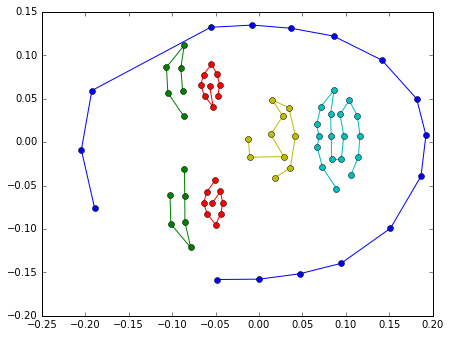

In [77]:
plt.figure(figsize=(7,7))
plt.gca().set_aspect('equal')
plotFaceShapeFromStasm(mean)

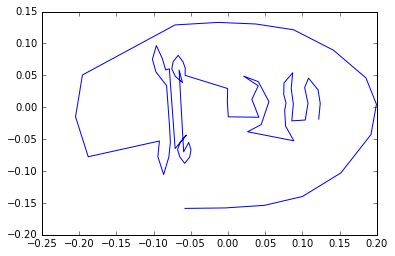

In [57]:
alignedfaces = d_aligned


plt.figure()
plt.plot(alignedfaces[2,:76], alignedfaces[2,76:])
plt.show()

## PCA

In [29]:
d_aligned.shape

(7510, 152)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=8)

pca.fit(d_aligned)

PCA(copy=True, n_components=8, whiten=False)

In [31]:
print(pca.explained_variance_ratio_) 

[ 0.3647211   0.24143537  0.08267473  0.05335566  0.05246151  0.04275283
  0.02842993  0.02242577]


In [32]:
cov_mat = np.cov(d_aligned.T)
print(cov_mat.shape)

eig_values, eig_vectors = np.linalg.eig(cov_mat)
print(eig_values.shape, eig_vectors.shape)

(152, 152)
(152,) (152, 152)


In [33]:
num_eigs = 8
Phi_matrix = eig_vectors[:,:num_eigs]

Phi_matrix.shape

(152, 8)

### Solving *b* vector

$$b = \Phi^T \left(x - \bar{x}\right)$$

In [38]:
# * ()
mean_matrix = np.reshape(mean, (152,1), 'F')
d_aligned_matrix = np.matrix(d_aligned)
delta = d_aligned_matrix.T - mean_matrix

b = (np.matrix(Phi_matrix).T * delta).T
b.shape

(7510, 8)

In [39]:
mean.dump('models/meanshape-ocvfmt.pkl')
eig_vectors.dump('models/eigenvectors-ocvfmt.pkl')
eig_values.dump('models/eigenvalues-ocvfmt.pkl')

Phi_matrix.dump('models/phimatrix.pkl')
b.dump('models/bvector.pkl')
d_aligned.dump('models/alignedfaces.pkl')
mean_matrix.dump('models/meanvector.pkl')